https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html

In [1]:

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config IPCompleter.use_jedi = False

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

rng = np.random.RandomState(41)

In [3]:
import seaborn as sns
sns.set()

In [4]:
# !curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [5]:
births = pd.read_csv('data/births.csv')


In [6]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


<AxesSubplot:xlabel='day'>

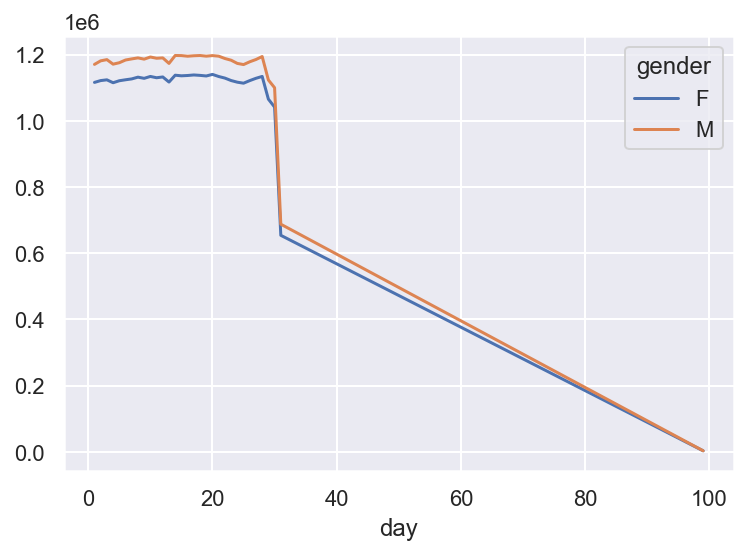

In [7]:
births.pivot_table('births', aggfunc='sum', index='gender', columns='day').T.plot()

In [8]:
sns.set()

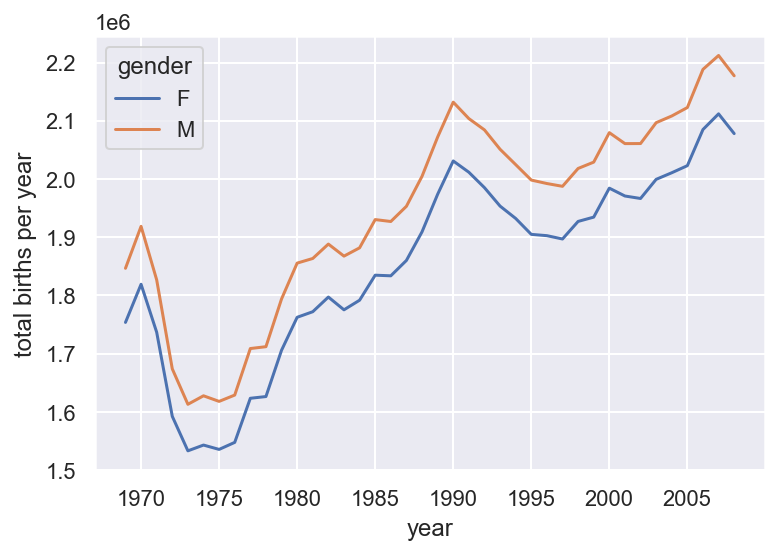

In [9]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

<AxesSubplot:xlabel='day'>

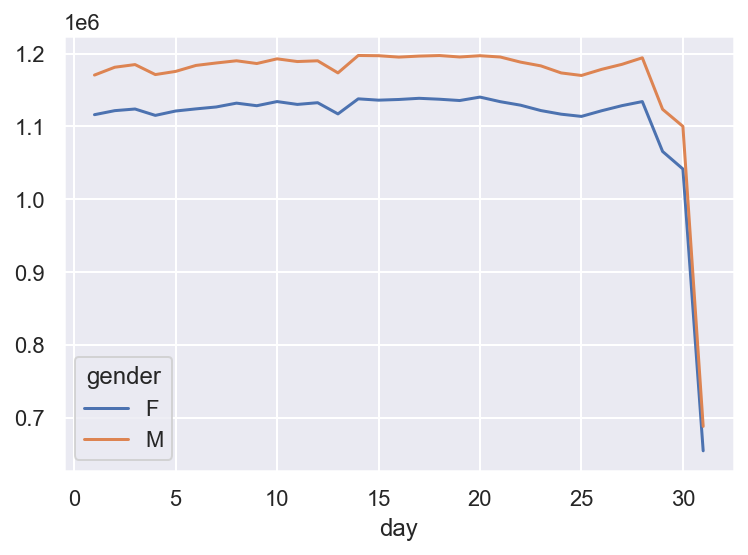

In [10]:
births[births.day<=31].pivot_table('births', aggfunc='sum', columns='gender', index='day').plot()

<AxesSubplot:xlabel='day'>

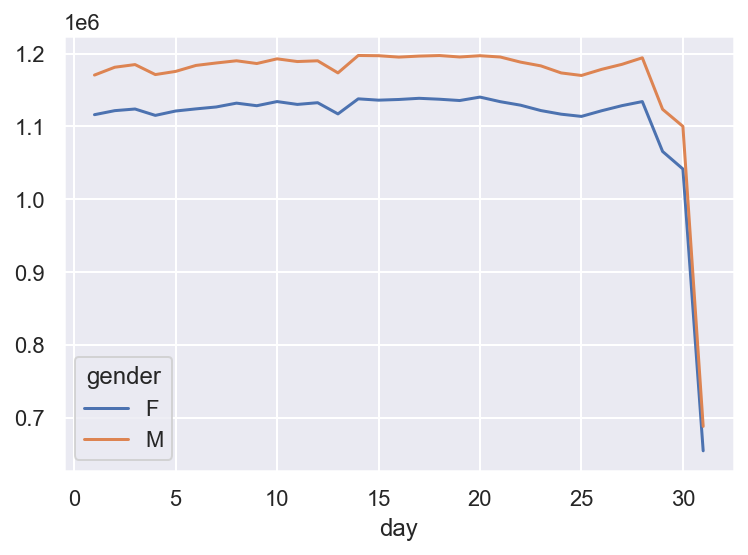

In [11]:
births.query('day<=31').pivot_table('births', aggfunc='sum', columns='gender', index='day').plot()

In [12]:
# 5-sigma clipping

In [13]:
mu, sig = births.births.mean(),births.births.std()
mask = (births.births > mu-5*sig)&(births.births < mu+5*sig)

In [14]:
births = births[mask].dropna()

In [15]:
births['day'] = births['day'].astype(int)


In [16]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d', errors='coerce')

births['dayofweek'] = births.index.dayofweek

/Users/koppelman/opt/anaconda3/envs/gold/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


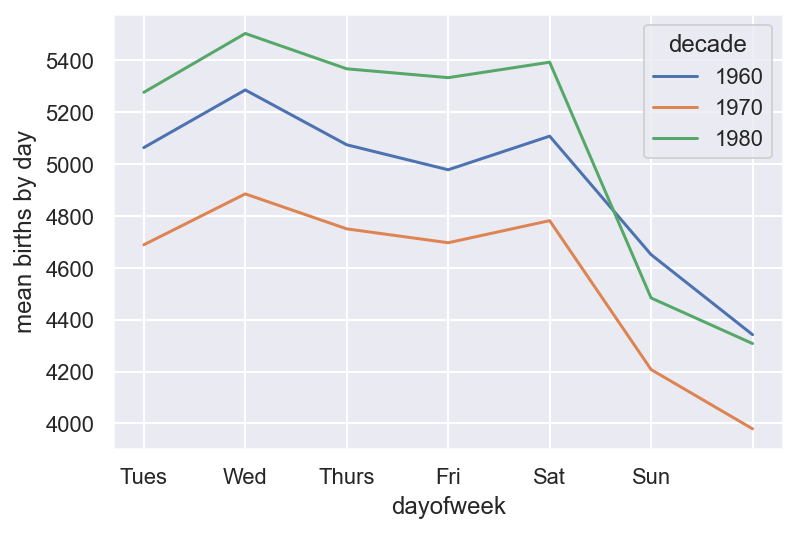

In [17]:
births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [18]:
births_by_date = births.pivot_table('births', index=[births.index.month, births.index.day], dropna=True)

In [19]:
levels = (level.astype(int) for level in births_by_date.index.levels)

In [20]:
births_by_date.index = births_by_date.index.set_levels(levels)

In [21]:
births_by_date

births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
...         ...
12 27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

In [22]:
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

/Users/koppelman/opt/anaconda3/envs/gold/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


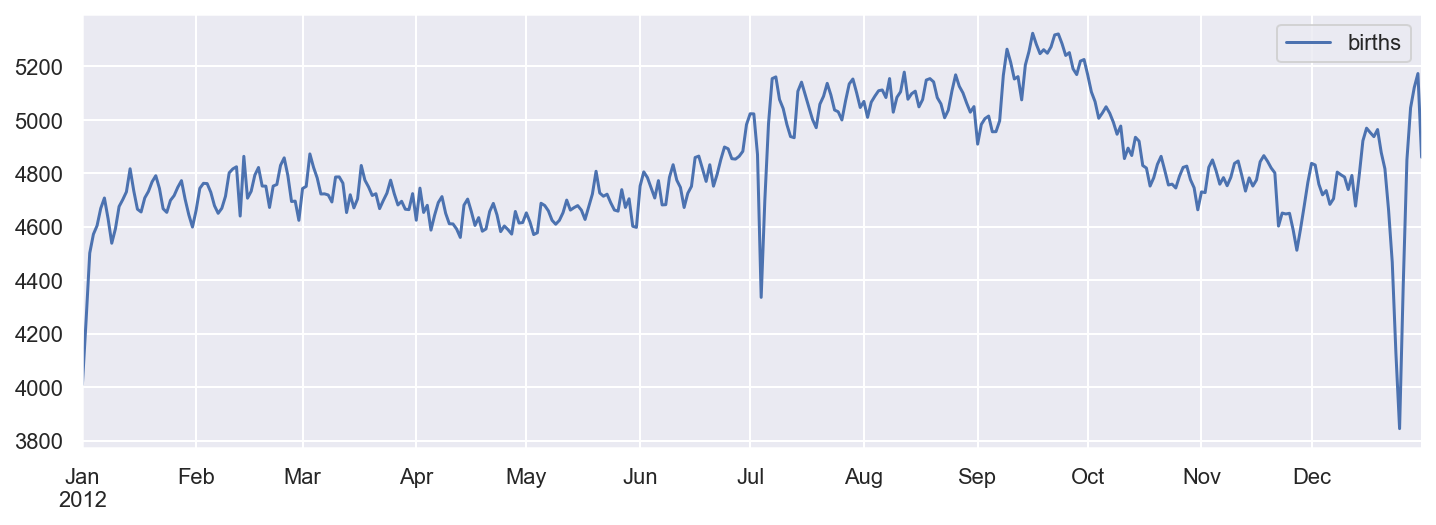

In [23]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);